# Introduction to Data Science
## Homework 3

Student Name: Can Cui

Student Netid: N12643845
***

### Part 1 (5 Points)
Assume that $X$ and $Y$ are discrete random variables. The formulas for Mutual Information, Entropy and Conditional Entropy are given by:

$$\text{Mutual Information} = \sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log\frac{p(x, y)}{p(x)p(y)}$$

$$\text{Entropy} = H(Y) = -\sum_{y \in Y} p(y) \cdot log(p(y))$$

$$\text{Conditional Entropy} = H(Y \mid X) = \sum_{x \in X} p(x) \cdot H(Y \mid X = x)$$

Show mathematically that $\text{Mutual Information} = \text{Information Gain}$, where $\text{Information Gain} = H(Y) – H(Y \mid X)$. Give the derivation below (note, this can be done using Latex math notation, which renders nicely. See above. Feel free to do it by hand and submit an image of your proof).

$$ H(Y) – H(Y \mid X) =  -\sum_{y \in Y} p(y) \cdot log(p(y)) - \sum_{x \in X} p(x) \cdot H(Y \mid X = x)$$
$$= -\sum_{y \in Y} p(y) \cdot log(p(y)) + \sum_{x \in X} p(x) \cdot \sum_{y \in Y} p(y\mid x) \cdot log(p(y \mid x))$$
$$= -\sum_{y \in Y} p(y) \cdot log(p(y)) + \sum_{x \in X}\sum_{y \in Y}  p(x)p(y\mid x) \cdot log(p(y \mid x))$$
$$= -\sum_{y \in Y} p(y) \cdot log(p(y)) + \sum_{x \in X}\sum_{y \in Y}  p(x,y) \cdot log(\frac{p(y,x)}{p(x)})$$
$$= -\sum_{y \in Y}\sum_{x \in X} p(x,y) \cdot log(p(y)) + \sum_{x \in X}\sum_{y \in Y}  p(x,y) \cdot log(\frac{p(y,x)}{p(x)})$$
$$= \sum_{x \in X}\sum_{y \in Y}  p(x,y) \cdot (log\frac{p(y,x)}{p(x)}-log(p(y)))$$
$$= \sum_{x \in X}\sum_{y \in Y}  p(x,y) \cdot log\frac{p(y,x)}{p(x)p(y)}$$

### Part 2 - Preparing a Training Set and Training a Decision Tree (10 Points)
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but DO NOT use the data splitting functions from Sklearn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cell2cell_data = pd.read_csv("cell2cell_data.csv")

cell2cell_data.columns = ['revenue','outcalls','incalls','months','eqpdays','webcap','marryyes',
                          'travel','pcown','creditcd','retcalls','churndep']

spt = np.random.rand(len(cell2cell_data)) < 0.8
train_df = cell2cell_data[spt]
test_df = cell2cell_data[~spt]

X_train = train_df.loc[:,'revenue':'retcalls']
X_train = X_train.values
y_train = train_df.loc[:,'churndep':'churndep']
y_train = y_train.values

X_test = test_df.loc[:,'revenue':'retcalls']
X_test = X_test.values
y_test = test_df.loc[:,'churndep':'churndep']
y_test = y_test.values

2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

**Answer:** If for any random varibale $S_i$ (here $S_i$ means any variable in the dataset, as `eqpdays` for example) $$\Pr(S_i|test) = \Pr(S_i)$$, which means that the sampling process doesn't suffer from the selection bias. Thus a test we can do is to check the difference of data distribution of $S_i$ and $S_i|test$. If there's no clear difference, (statistical tools such as T-test, F-test can be used), we can see it was sampled randomly 

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

In [2]:
from sklearn.tree import DecisionTreeClassifier 

classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(train_df.loc[:,'revenue':'retcalls'], train_df.loc[:,'churndep':'churndep'])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

4\. Using the resulting model from 2.3, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!). Make sure the bar plot is sorted by increasing feature importance values.

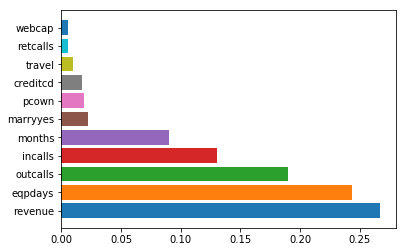

In [3]:
import operator
data = dict(zip(train_df.columns[:-1],classifier.feature_importances_))
data = dict(sorted(data.items(), key=operator.itemgetter(1), reverse = True))
names = list(data.keys())
values = list(data.values())
for i in range(len(names)):
    plt.barh(i,values[i],tick_label=names[i])
plt.yticks(range(len(names)),names)
plt.show()

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome? What "real-life" connection can you draw between each variable and churn? Make sure to state your answer, and not just show code.

Based on pearson corraltion, `revenue` has negative corration with `eqpdays` but positive relationship with `outcalls`. `eqpdays` has negative correation with `outcalls` but positive correlatioon with `churndep`. Since customers make more outcalls will spend more money on the monthly payment, thus those two variables have postive relationship, which also means that people are more likely to stay on the platform. Also, if a user use his phone service for long time, his usage is more likely to be of a stable tendency. It might also true that if that churn risk is higher among users who stay for long but spend less compared with users who stay for long but spend more (proved by the following table).

In [143]:
# Pearson correlation
train_df[['revenue','eqpdays','outcalls','churndep']].corr('pearson')

,revenue,eqpdays,outcalls,churndep
revenue,1.000000,-0.222333,0.498209,-0.015431
eqpdays,-0.222333,1.000000,-0.242408,0.115846
outcalls,0.498209,-0.242408,1.000000,-0.037322
churndep,-0.015431,0.115846,-0.037322,1.000000


In [4]:
df = (pd.DataFrame(train_df, columns=['revenue','eqpdays','churndep'])
      .assign(revenue_=lambda x: pd.cut(x.revenue, bins=6), eqpdays_=lambda x: pd.cut(x.eqpdays, bins=6))
      .groupby(['eqpdays_','revenue_'])
      .agg({'churndep': ['sum', 'count']})
     )

df.reset_index()
df.columns
df = df.swaplevel(0,1,axis =1)
df['churn_perc']=df['sum']/df['count']
df

sum    count churn_perc
                                      churndep churndep           
eqpdays_             revenue_                                     
(-6.828, 299.667]    (-6.721, 137.7]      4604    11811   0.389806
                     (137.7, 281.26]       416      866   0.480370
                     (281.26, 424.82]       37       81   0.456790
                     (424.82, 568.38]       10       25   0.400000
                     (568.38, 711.94]        1        7   0.142857
                     (711.94, 855.5]         2        3   0.666667
(299.667, 604.333]   (-6.721, 137.7]      7180    12687   0.565934
                     (137.7, 281.26]       261      453   0.576159
                     (281.26, 424.82]       19       32   0.593750
                     (424.82, 568.38]        1        5   0.200000
                     (711.94, 855.5]         0        1   0.000000
(604.333, 909.0]     (-6.721, 137.7]      2487     4505   0.552053
                     (137.7, 281.26]        39       82   0.475610
                     (281.26, 424.82]        4        4   1.000000
                     (424.82, 568.38]        0        1   0.000000
(909.0, 1213.667]    (-6.721, 137.7]       696     1179   0.590331
                     (137.7, 281.26]         8       15   0.533333
(1213.667, 1518.333] (-6.721, 137.7]       138      206   0.669903
(1518.333, 1823.0]   (-6.721, 137.7]        18       38   0.473684

6\. Using the classifier built in 2.3, try predicting "churndep" on both the train_df and test_df data sets. What is the accuracy on each? What is your explanation on the difference (or lackthereof) between the two accuracies?

The accurracy of training data is `0.9998` and test data is `0.5287`. Higher difference is because that the model is overfitting against training data, as a result, the model doesn't perform well on the test data. 

In [8]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
# Function to make predictions 
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 
      
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: ", confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", classification_report(y_test, y_pred)) 

print("Report : test data") 
y_pred = prediction(X_test, classifier) 
cal_accuracy(y_test, y_pred) 
print("--------------------------------------------------") 
print("Report : training data") 
y_pred = prediction(X_train, classifier) 
cal_accuracy(y_train, y_pred)

Report : test data
Predicted values:
[0 0 0 ... 0 1 1]
Confusion Matrix:  [[2048 1830]
 [1873 2106]]
Accuracy :  52.870052182766955
Report :               precision    recall  f1-score   support

          0       0.52      0.53      0.53      3878
          1       0.54      0.53      0.53      3979

avg / total       0.53      0.53      0.53      7857

--------------------------------------------------
Report : training data
Predicted values:
[1 1 1 ... 0 0 0]
Confusion Matrix:  [[16080     0]
 [    3 15918]]
Accuracy :  99.99062529295959
Report :               precision    recall  f1-score   support

          0       1.00      1.00      1.00     16080
          1       1.00      1.00      1.00     15921

avg / total       1.00      1.00      1.00     32001



### Part 3 - Finding a Good Decision Tree (10 Points)
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters mim_samples_split and min_samples_leaf. 

In [35]:
min_samples_split_values = np.linspace(0.07, 0.15, 10, endpoint=True)
min_samples_leaf_values = np.linspace(0.0005, 0.10, 10, endpoint=True)


2\. Explain in words your reasoning for choosing the above ranges.

`min_samples_split` represents the minimum number of samples required to split an internal node. if float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split. This can vary between considering at least one sample at each node to considering all of the samples at each node, and the range is between `(0%, 100%]` of the sample size. thus from the start I evently split the range from `[5%, 100%]`, in order to cover the most of the data. As I manipulate the parameter and accuracy, I found that the range `[7%, 15%]` I will get a higher accuracy

`min_samples_leaf` is The minimum number of samples required to be at a leaf node. f float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node. This parameter is similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs, the base of the tree  [(reference)](https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3) and the range is between `(0%, 50%]` of the sample size. thus from the start I evently split the range from `[5%, 50%]`, in order to cover the most of the data. As I manipulate the parameter and accuracy, I found that the range `[0.05%, 10%]` I will get a higher accuracy

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

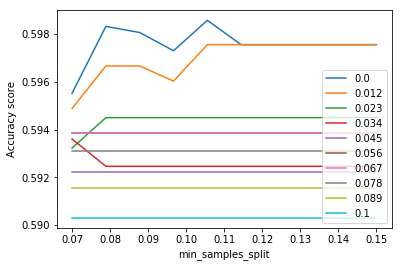

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve,auc
%matplotlib inline

min_samples_split_values = np.linspace(0.07, 0.15, 10, endpoint=True)
min_samples_leaf_values = np.linspace(0.0005, 0.10, 10, endpoint=True)

test_results  = []
for min_samples_split in min_samples_split_values:
    for min_samples_leaf in min_samples_leaf_values:
        dt = DecisionTreeClassifier(min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        roc_auc = accuracy_score(y_test, y_pred)
        test_results.append([min_samples_split, min_samples_leaf, roc_auc])

df = pd.DataFrame(test_results, columns = ['min_samples_split','min_samples_leaf','Accuracy'])
for i in min_samples_leaf_values:
    plt.plot('min_samples_split', 'Accuracy', data=df[df['min_samples_leaf'] == i],label = round(i,3))
    plt.legend(loc='lower right')
plt.ylabel('Accuracy score')
plt.xlabel('min_samples_split')
plt.show()

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values), and reassess your answer in Q3.2.

The following below gets the best accuracy 

`min_samples_split    0.105556
min_samples_leaf     0.000500
roc_auc              0.598575`

In [39]:
df.loc[df['Accuracy'].idxmax()]

min_samples_split    0.105556
min_samples_leaf     0.000500
Accuracy             0.598575
Name: 40, dtype: float64

5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

Using the churn model, marketing team can use marketing strategies such as discount or sales promotion or personalized customer service outbound calls to contact with high risk customers and retain them beforehind in order to decrease the churn rate. In other words, take action before it's late. It's good for the company to cut cost, since the cost of retaining a customer is far lower than acquiring a new one, and as a result increase the total revenue.  